最短距離: 6.571
最短巡回路:
A -> B -> C -> D -> E -> F -> A
A -> F -> E -> D -> C -> B -> A


C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37117 (\N{CJK UNIFIED IDEOGRAPH-90FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\flare\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


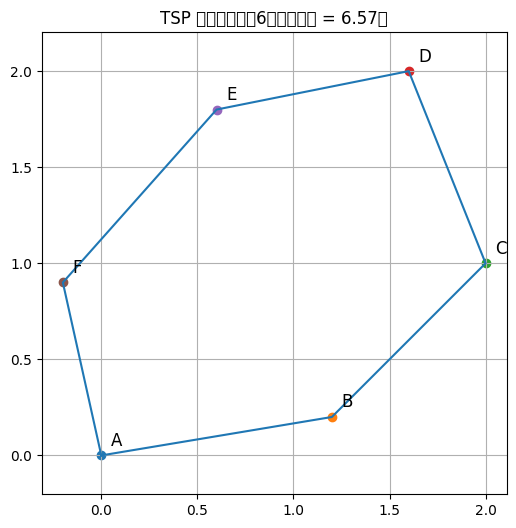

In [3]:
import itertools
import math
import matplotlib.pyplot as plt

# =========================
# 都市（座標：6点）
# =========================
cities = {
    "A": (0.0, 0.0),
    "B": (1.2, 0.2),
    "C": (2.0, 1.0),
    "D": (1.6, 2.0),
    "E": (0.6, 1.8),
    "F": (-0.2, 0.9),
}

def dist(a, b):
    x1, y1 = cities[a]
    x2, y2 = cities[b]
    return math.hypot(x1 - x2, y1 - y2)

# =========================
# TSP 総当たり（始点固定）
# =========================
start = "A"
others = [c for c in cities if c != start]

best_len = float("inf")
best_tours = []

for perm in itertools.permutations(others):
    tour = (start,) + perm + (start,)
    length = sum(dist(tour[i], tour[i+1]) for i in range(len(tour) - 1))

    if length < best_len - 1e-12:
        best_len = length
        best_tours = [tour]
    elif abs(length - best_len) <= 1e-12:
        best_tours.append(tour)

print("最短距離:", round(best_len, 3))
print("最短巡回路:")
for t in best_tours:
    print(" -> ".join(t))

# =========================
# 可視化（最短ツアー1本）
# =========================
tour = best_tours[0]

plt.figure(figsize=(6, 6))

# 都市
for name, (x, y) in cities.items():
    plt.scatter(x, y)
    plt.text(x + 0.05, y + 0.05, name, fontsize=12)

# 巡回路
tx = [cities[c][0] for c in tour]
ty = [cities[c][1] for c in tour]
plt.plot(tx, ty)

plt.title(f"TSP 最短巡回路（6都市・距離 = {best_len:.2f}）")
plt.axis("equal")
plt.grid(True)
plt.show()
